In [11]:
import matplotlib.pyplot as plt

In [1]:
import numpy as np

X = 2 * np.random.randn(100, 5)
y = 2.5382 * np.cos(X[:, 3]) + X[:, 0] ** 2 - 0.5

we have created a dataset with 100 points, with 5 features each. The relation we want to investigate is

$$
2.5382cos(x_3)+x_0^2-0.5
$$

In [2]:
from pysr import PySRRegressor

model = PySRRegressor(
    niterations=40,  # < Increase me for better results
    binary_operators=["+", "*"],
    unary_operators=[
        "cos",
        "exp",
        "sin",
        "inv(x) = 1/x",
        # ^ Custom operator (julia syntax)
    ],
    extra_sympy_mappings={"inv": lambda x: 1 / x},
    # ^ Define operator for SymPy as well
    loss="loss(prediction, target) = (prediction - target)^2",
    # ^ Custom loss function (julia syntax)
)

In [6]:
model.fit(X, y)

/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1773: UserWarning: The discovered expressions are being reset. Please set `warm_start=True` if you wish to continue to start a search where you left off.
  warnings.warn(
/Users/francescofarinelli/miniconda3/envs/simreg/lib/python3.11/site-packages/pysr/sr.py:1296: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Started!


PySRRegressor.equations_ = [
	   pick      score                                   equation          loss  \
	0         0.000000                                  3.2374184  3.211113e+01   
	1         1.204650                                  (x0 * x0)  2.886092e+00   
	2         0.019408                  ((x0 * x0) + -0.33160332)  2.776213e+00   
	3         0.857358                      ((x0 * x0) + cos(x3))  1.177896e+00   
	4         0.780101        ((x0 * x0) + (cos(x3) * 2.4619434))  2.474685e-01   
	5  >>>>  13.730534  ((x0 * x0) + ((cos(x3) * 2.5382) + -0.5))  2.933118e-13   
	
	   complexity  
	0           1  
	1           3  
	2           5  
	3           6  
	4           8  
	5          10  
]

In [7]:
print(model)

PySRRegressor.equations_ = [
	   pick      score                                   equation          loss  \
	0         0.000000                                  3.2374184  3.211113e+01   
	1         1.204650                                  (x0 * x0)  2.886092e+00   
	2         0.019408                  ((x0 * x0) + -0.33160332)  2.776213e+00   
	3         0.857358                      ((x0 * x0) + cos(x3))  1.177896e+00   
	4         0.780101        ((x0 * x0) + (cos(x3) * 2.4619434))  2.474685e-01   
	5  >>>>  13.730534  ((x0 * x0) + ((cos(x3) * 2.5382) + -0.5))  2.933118e-13   
	
	   complexity  
	0           1  
	1           3  
	2           5  
	3           6  
	4           8  
	5          10  
]


In [24]:
z=model.predict(X, 3)

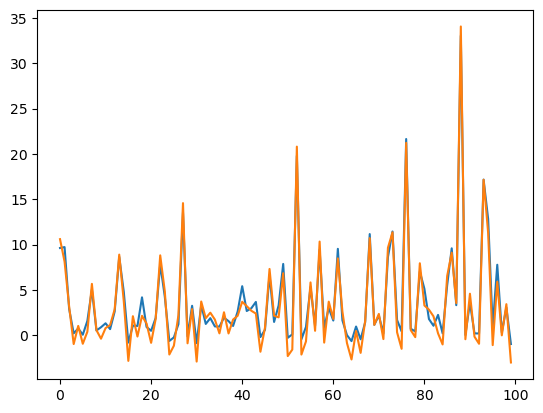

In [25]:
plt.plot(z)
plt.plot(y)

### Detailed Example

The following code makes use of as many PySR features as possible. Note that is just a demonstration of features and you should not use this example as-is. For details on what each parameter does, check out the API page.

In [ ]:
model = PySRRegressor(
    procs=4,
    populations=8,
    # ^ 2 populations per core, so one is always running.
    population_size=50,
    # ^ Slightly larger populations, for greater diversity.
    ncyclesperiteration=500, 
    # ^ Generations between migrations.
    niterations=10000000,  # Run forever
    early_stop_condition=(
        "stop_if(loss, complexity) = loss < 1e-6 && complexity < 10"
        # Stop early if we find a good and simple equation
    ),
    timeout_in_seconds=60 * 60 * 24,
    # ^ Alternatively, stop after 24 hours have passed.
    maxsize=50,
    # ^ Allow greater complexity.
    maxdepth=10,
    # ^ But, avoid deep nesting.
    binary_operators=["*", "+", "-", "/"],
    unary_operators=["square", "cube", "exp", "cos2(x)=cos(x)^2"],
    constraints={
        "/": (-1, 9),
        "square": 9,
        "cube": 9,
        "exp": 9,
    },
    # ^ Limit the complexity within each argument.
    # "inv": (-1, 9) states that the numerator has no constraint,
    # but the denominator has a max complexity of 9.
    # "exp": 9 simply states that `exp` can only have
    # an expression of complexity 9 as input.
    nested_constraints={
        "square": {"square": 1, "cube": 1, "exp": 0},
        "cube": {"square": 1, "cube": 1, "exp": 0},
        "exp": {"square": 1, "cube": 1, "exp": 0},
    },
    # ^ Nesting constraints on operators. For example,
    # "square(exp(x))" is not allowed, since "square": {"exp": 0}.
    complexity_of_operators={"/": 2, "exp": 3},
    # ^ Custom complexity of particular operators.
    complexity_of_constants=2,
    # ^ Punish constants more than variables
    select_k_features=4,
    # ^ Train on only the 4 most important features
    progress=True,
    # ^ Can set to false if printing to a file.
    weight_randomize=0.1,
    # ^ Randomize the tree much more frequently
    cluster_manager=None,
    # ^ Can be set to, e.g., "slurm", to run a slurm
    # cluster. Just launch one script from the head node.
    precision=64,
    # ^ Higher precision calculations.
    warm_start=True,
    # ^ Start from where left off.
    turbo=True,
    # ^ Faster evaluation (experimental)
    julia_project=None,
    # ^ Can set to the path of a folder containing the
    # "SymbolicRegression.jl" repo, for custom modifications.
    update=False,
    # ^ Don't update Julia packages
    extra_sympy_mappings={"cos2": lambda x: sympy.cos(x)**2},
    # extra_torch_mappings={sympy.cos: torch.cos},
    # ^ Not needed as cos already defined, but this
    # is how you define custom torch operators.
    # extra_jax_mappings={sympy.cos: "jnp.cos"},
    # ^ For JAX, one passes a string.
)